# Imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Functions for simulation
from MMn import simulate_MMn
from MMn_SJF import simulate_MMn_SJF
from MDn import simulate_MDn
from MLn import simulate_MLn

# Functions used for analysis
from Analysis import *

# Constant Parameters

In [61]:
customers = 100000
mu = 1

# For multiple rho's and multiple servers
ns = [1, 2, 4]
rhos = np.linspace(0.5, 0.99, 20)

# Problem 2  

# Problem 3

In [62]:
# Results 
results = []

for rho in rhos:
    # List to store results for current rho
    res = []
    for n in ns:
        # Get the waiting times
        waiting = simulate_MMn_SJF(customers, rho, mu)

        # Mean and confidence interval
        wait_avg, wait_conf = statistics(waiting, print_info=False)
        
        # Add to res
        res.append(wait_avg)
        res.append(wait_conf)
    
    # Add to results
    results.append(res)

# Convert to numpy array
results = np.array(results)

# Save results
np.savetxt('results/MMn_SJF.txt', results)

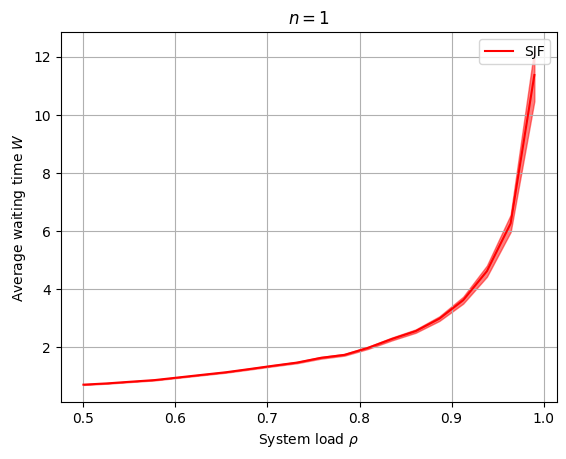

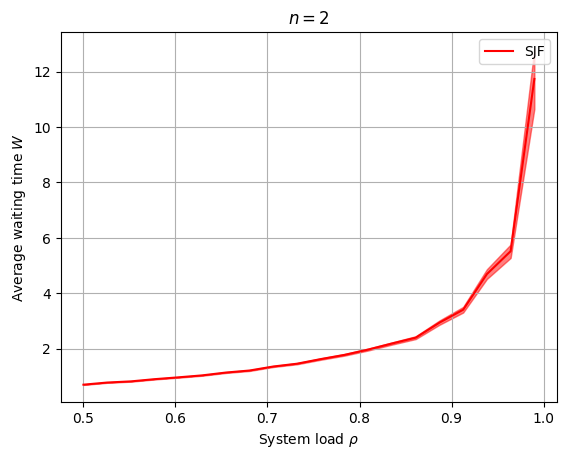

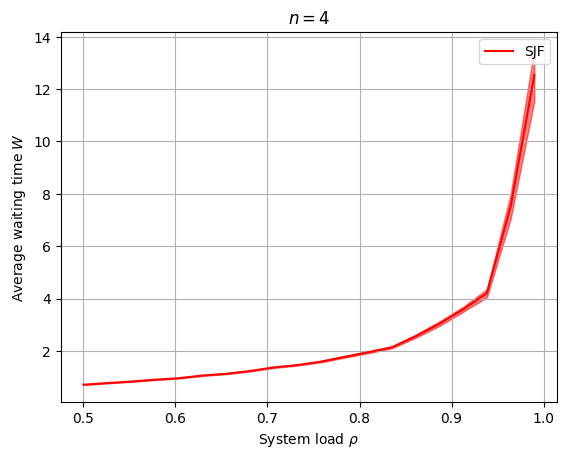

In [63]:
# Load data
results = np.loadtxt('results/MMn_SJF.txt').T

# Loop through each n
for i in range(results.shape[0] // 2):
    # Create figure
    fig, ax = plt.subplots()
    
    # Get the average waiting time and the confidence interval
    waiting_avg = results[i*2]
    waiting_conf = results[i*2 + 1]
    
    # Calculate left and right interval from confidence
    left = waiting_avg - waiting_conf
    right = waiting_avg + waiting_conf
    
    # Plot data from SJF
    ax.plot(rhos, waiting_avg, label='SJF', color='red')
    ax.fill_between(rhos, left, right, color='red', alpha=0.5)
    
    # Plot data for FIFO
    # ax.plot() # Add data from FIFO
    
    
    # Figure settings
    ax.grid()
    ax.legend()
    ax.set_xlabel('System load $\\rho$')
    ax.set_ylabel('Average waiting time $W$')
    ax.set_title(f'$n = {ns[i]}$')
    

# Problem 4

### M/D/n

Average waiting time: 4.599136138710604 +- 0.009497160894904532
Average waiting time: 4.568208685566728 +- 0.009607825767917758
Average waiting time: 4.493219650220449 +- 0.009420153828456613


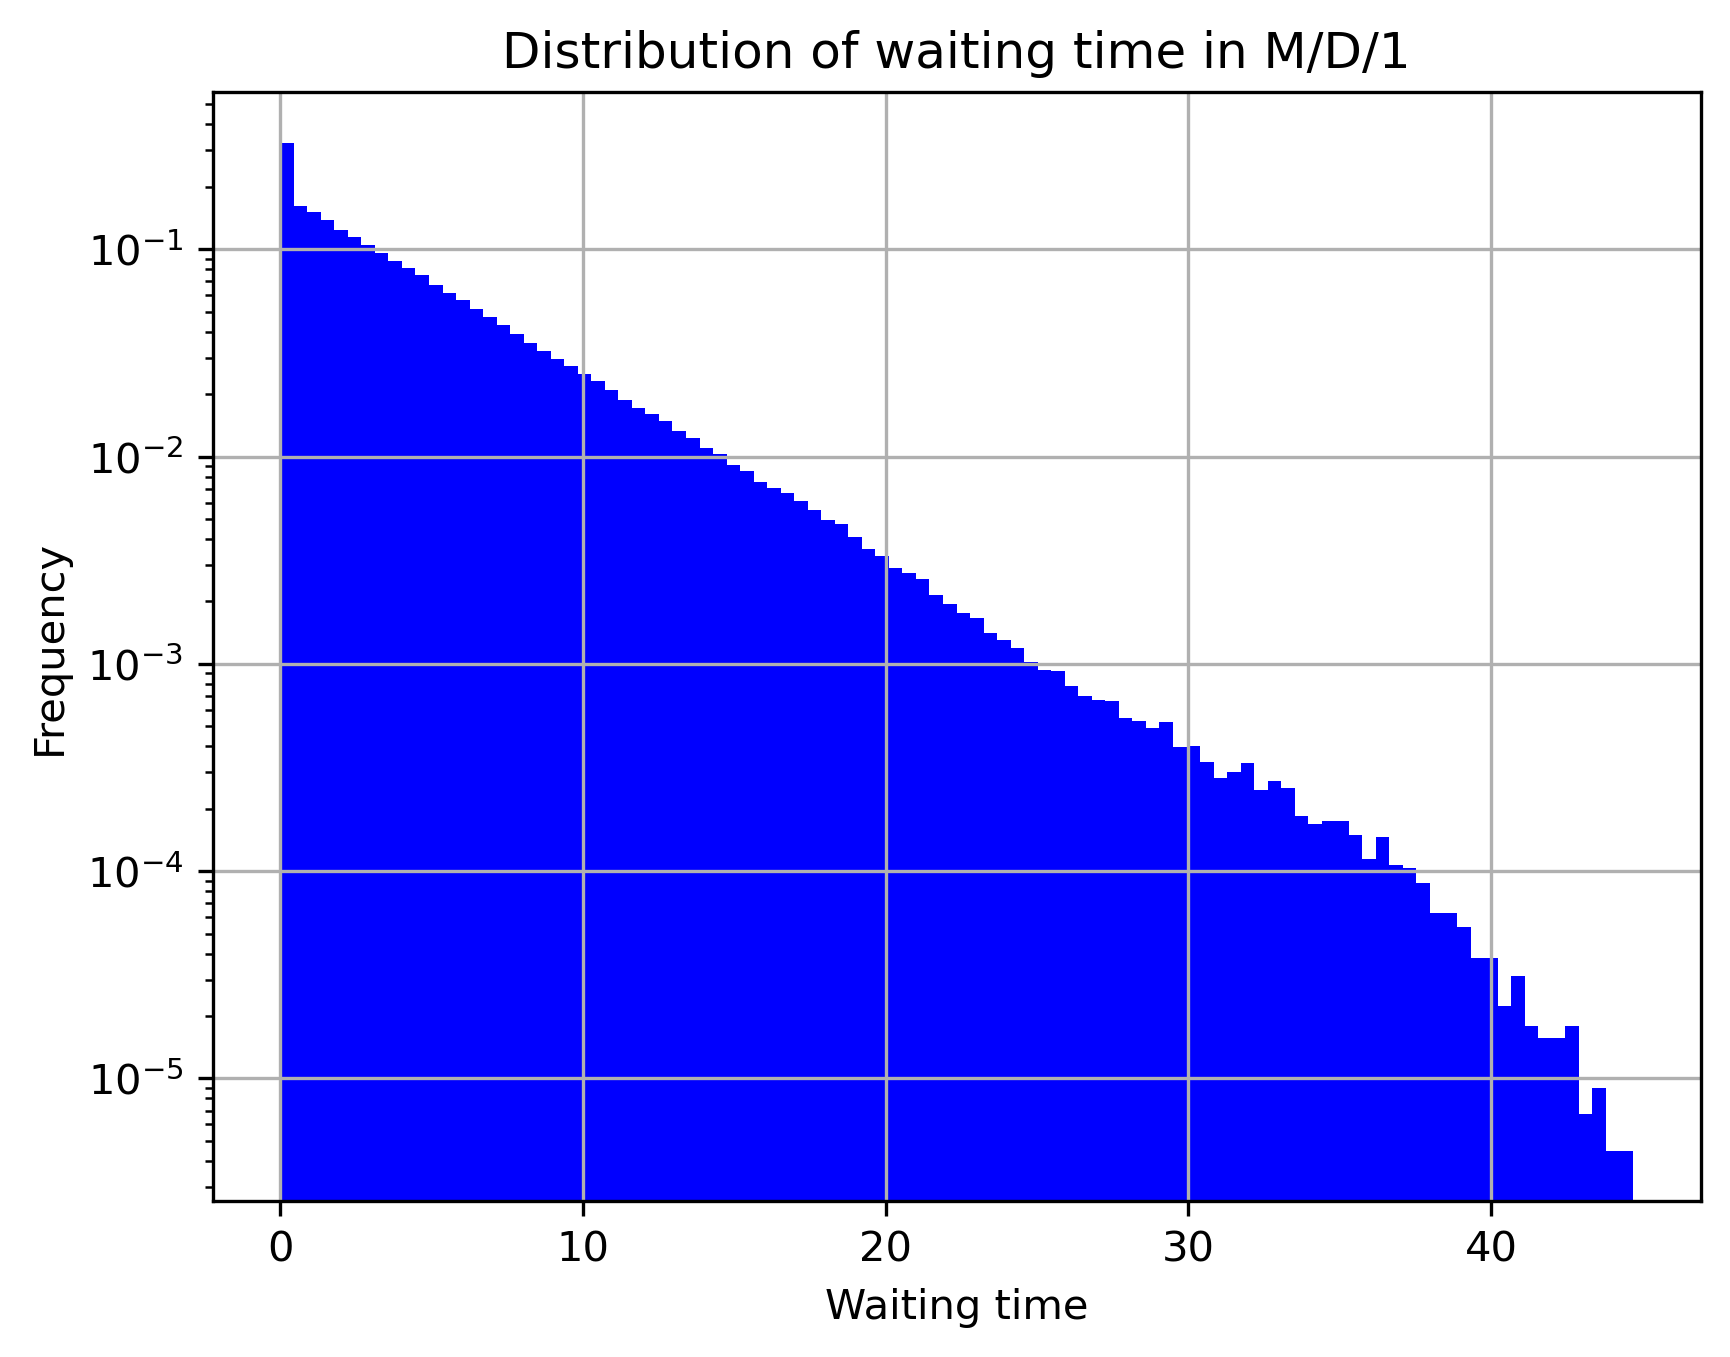

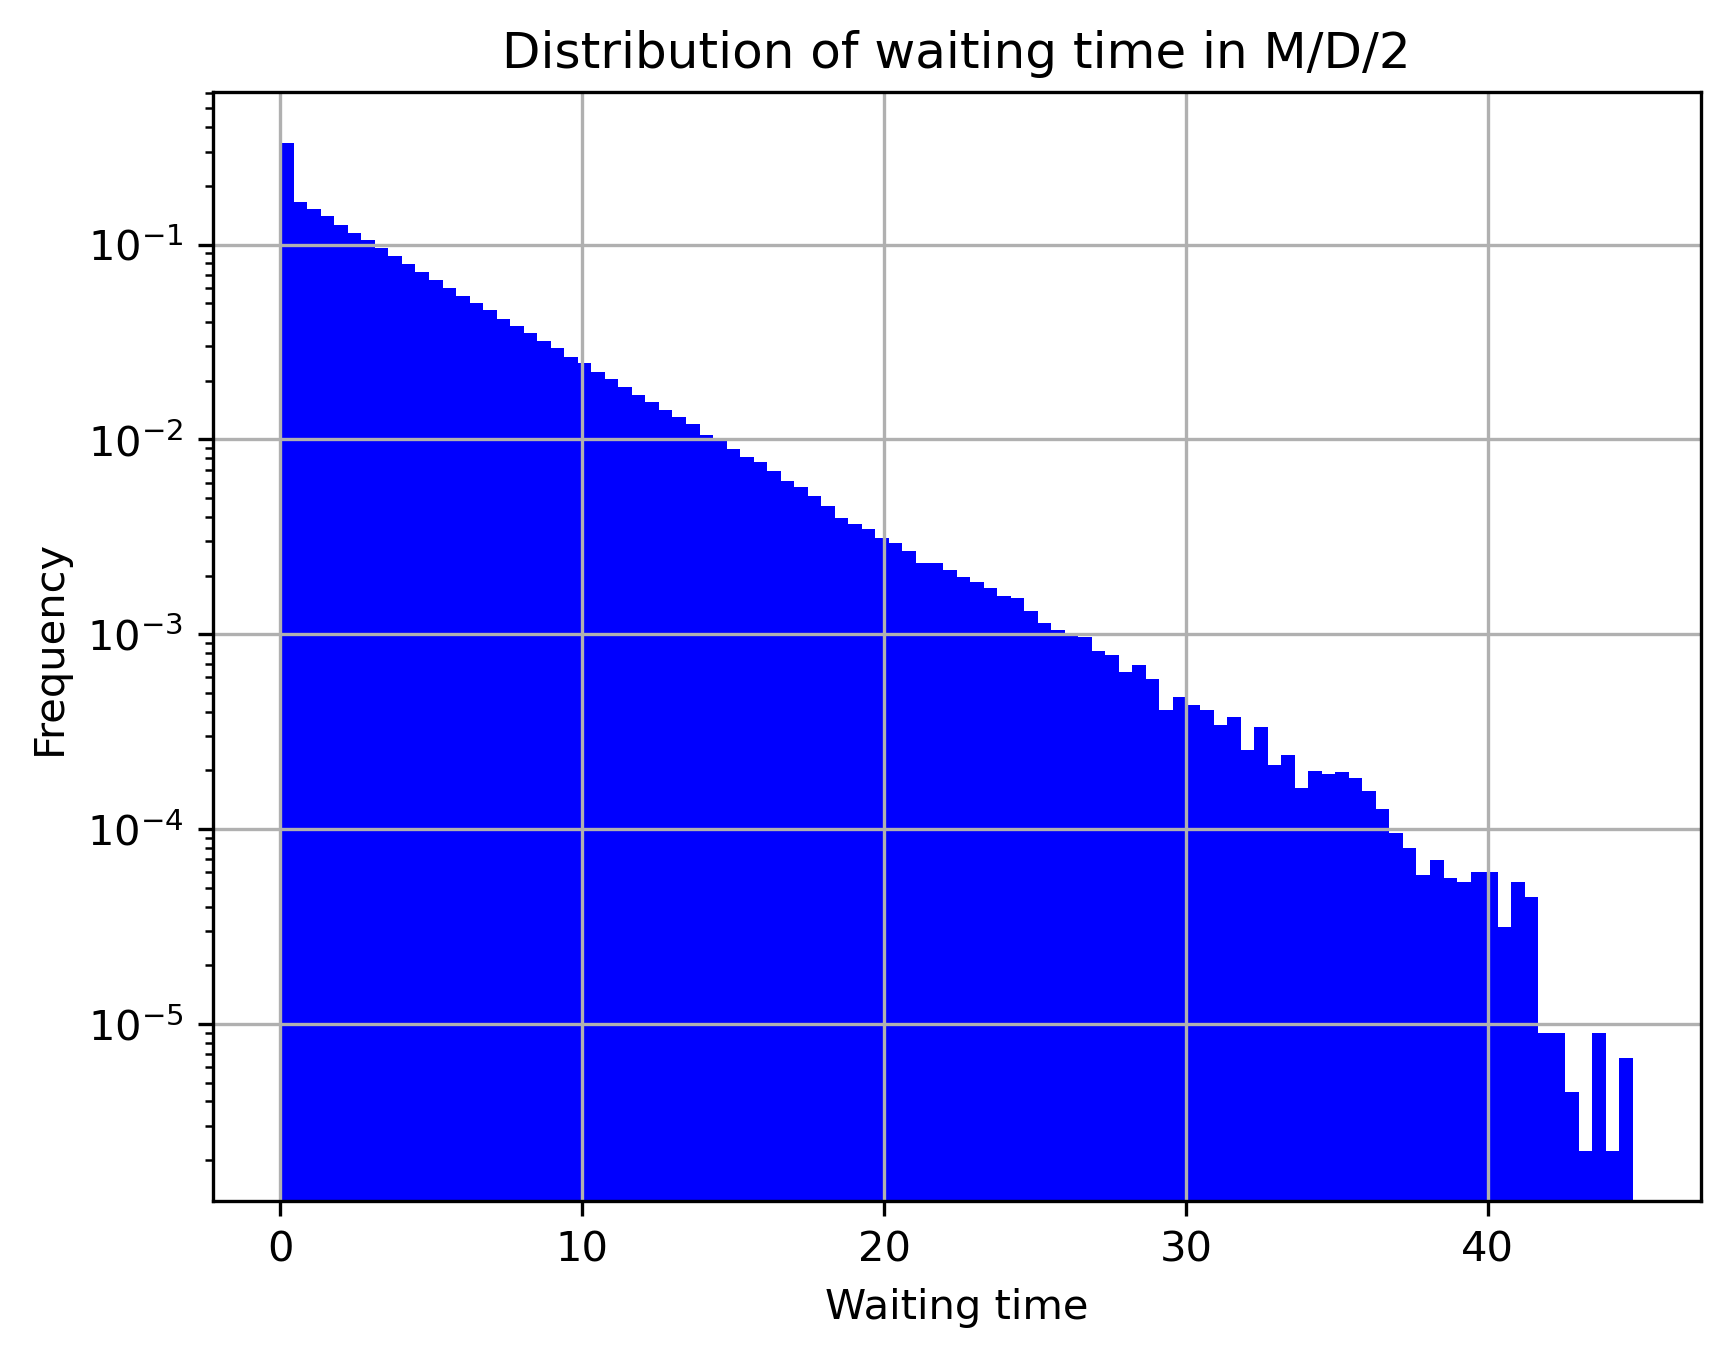

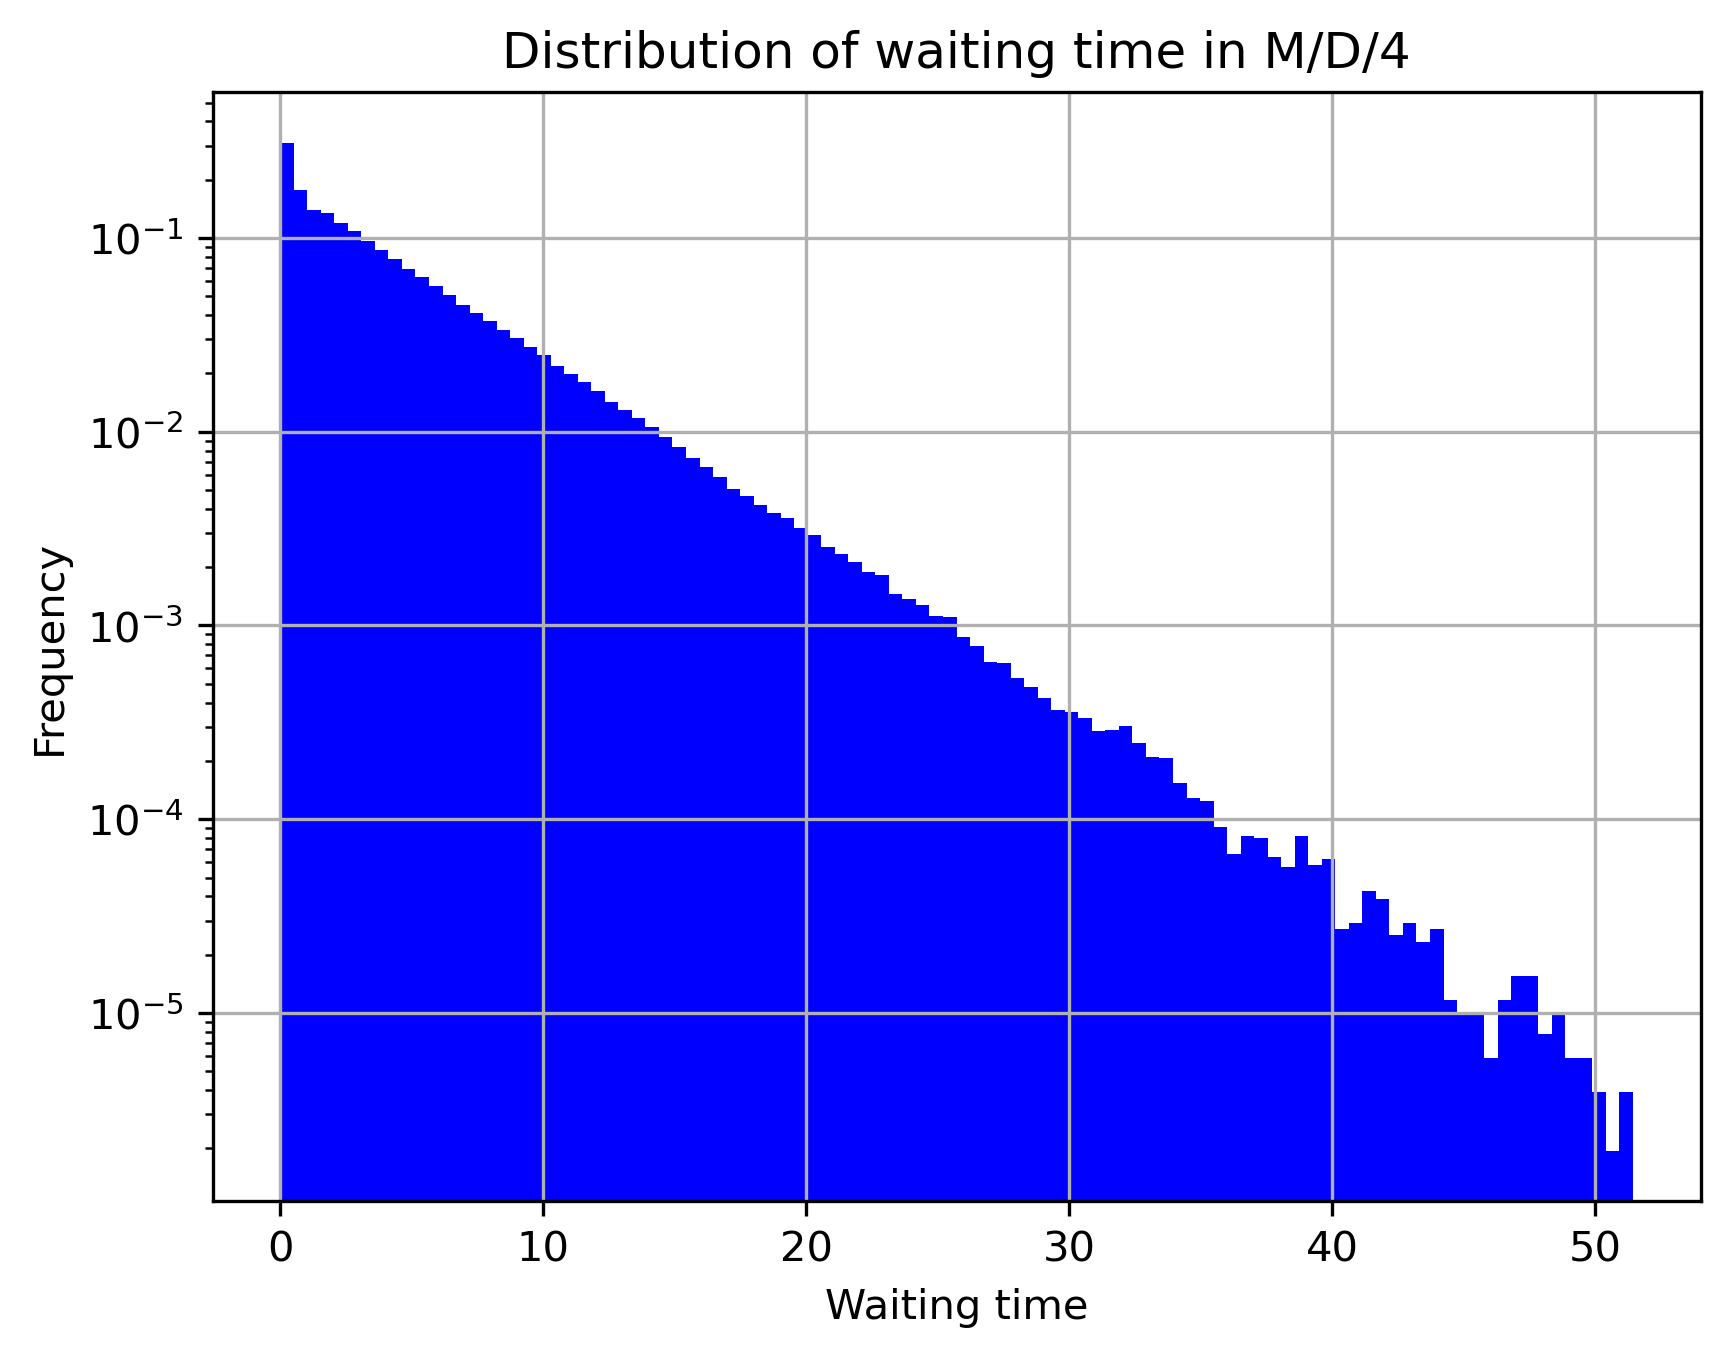

In [7]:
# Parameters
mu = 1
rho = 0.9

# Compare M/D/1 with M/D/n
ns = [1, 2, 4]
for n in ns:
    W = simulate_MDn(customers, rho, mu, 1)
    statistics(W)
    fig, ax = visualize(W, f'Distribution of waiting time in M/D/{n}', yscaling='log')

### M/L/n

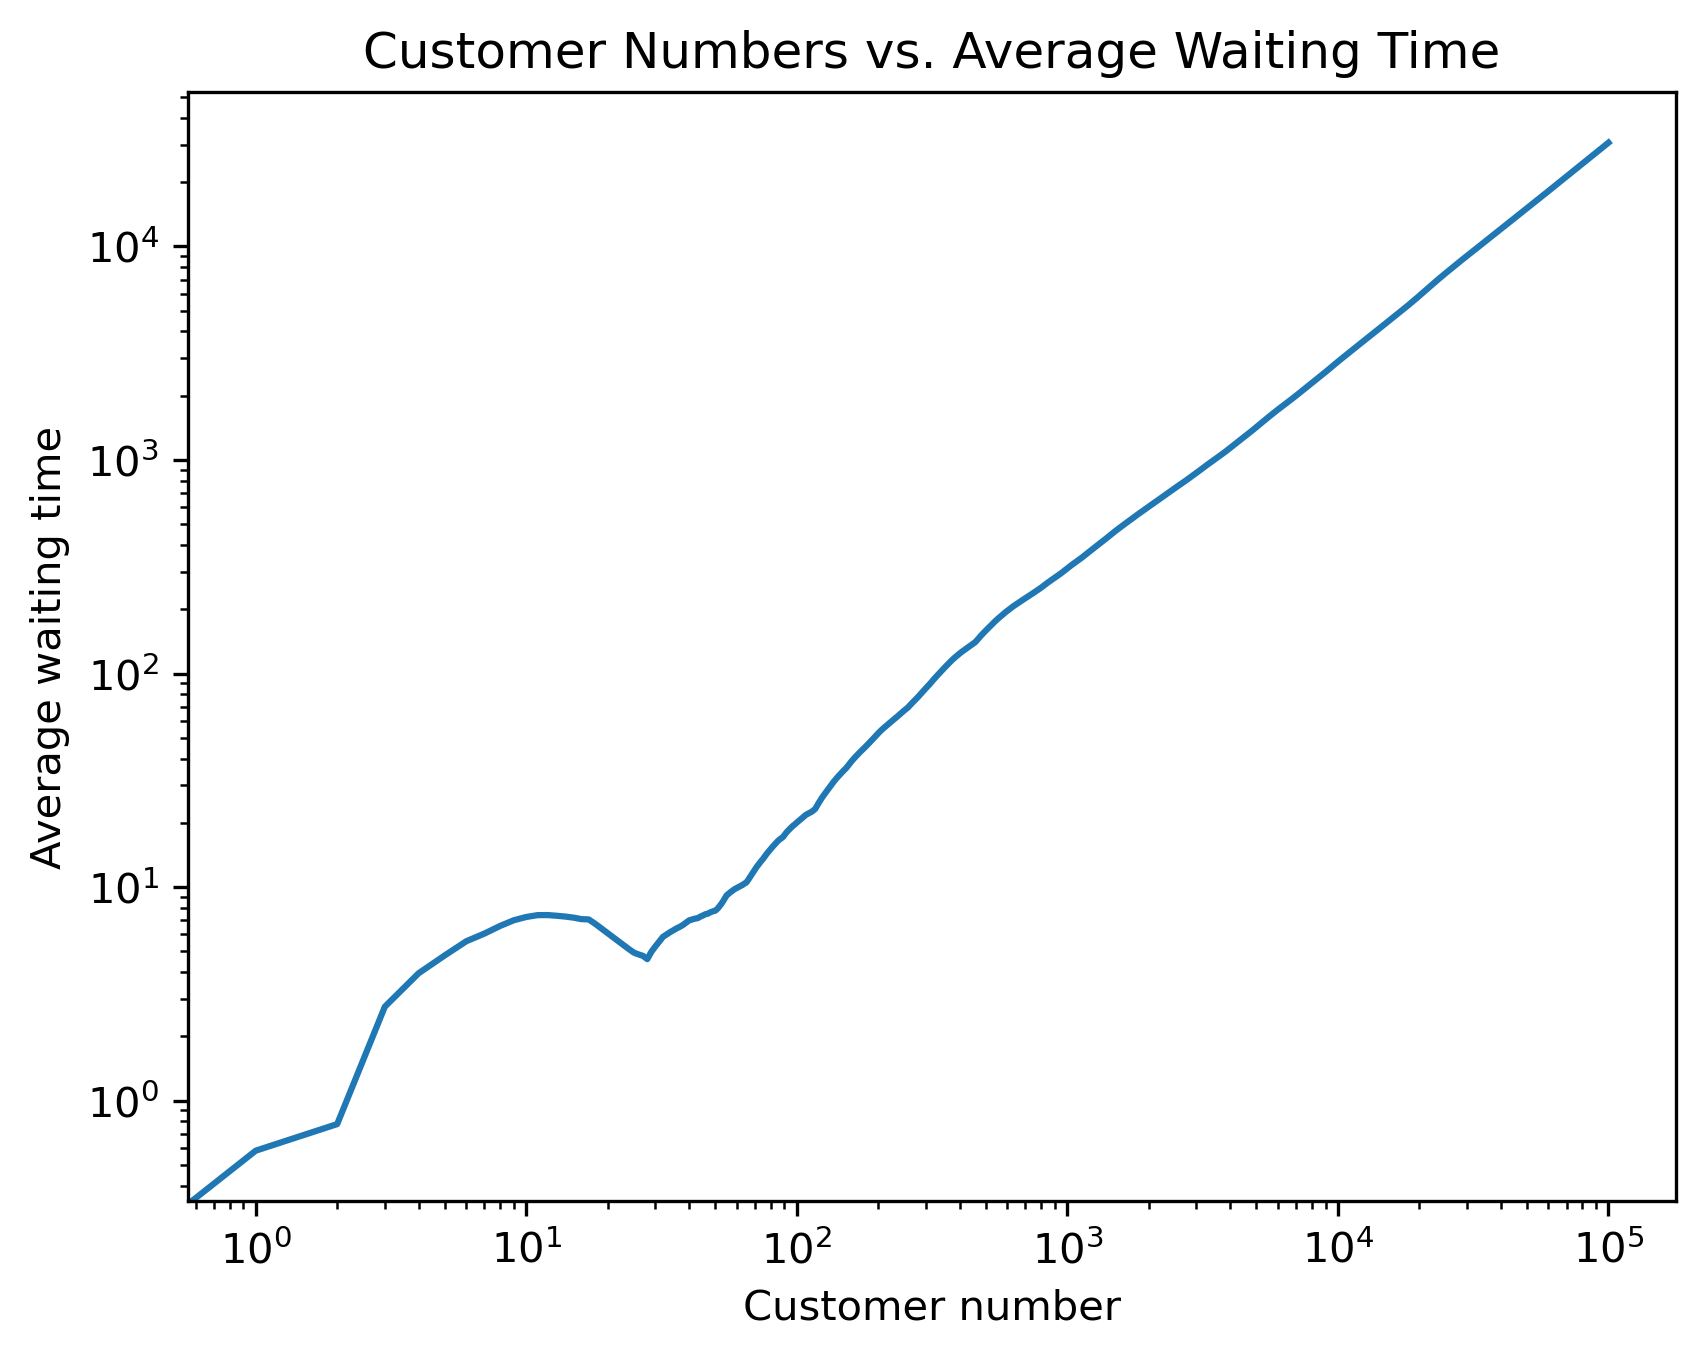

In [4]:
# How does the average waiting time change with customer number

# Parameters
rho = 0.9
mu = [1., 1/5]
p = 0.75
w = simulate_MLn(customers, rho, mu, p, 1)

# Get means
waiting_means = np.cumsum(w) / np.arange(1, customers + 1)

plt.figure(dpi=300)
plt.title('Customer Numbers vs. Average Waiting Time')
plt.ylabel('Average waiting time')
plt.xlabel('Customer number')
plt.plot(waiting_means)
plt.xscale('log')
plt.yscale('log')
plt.show()

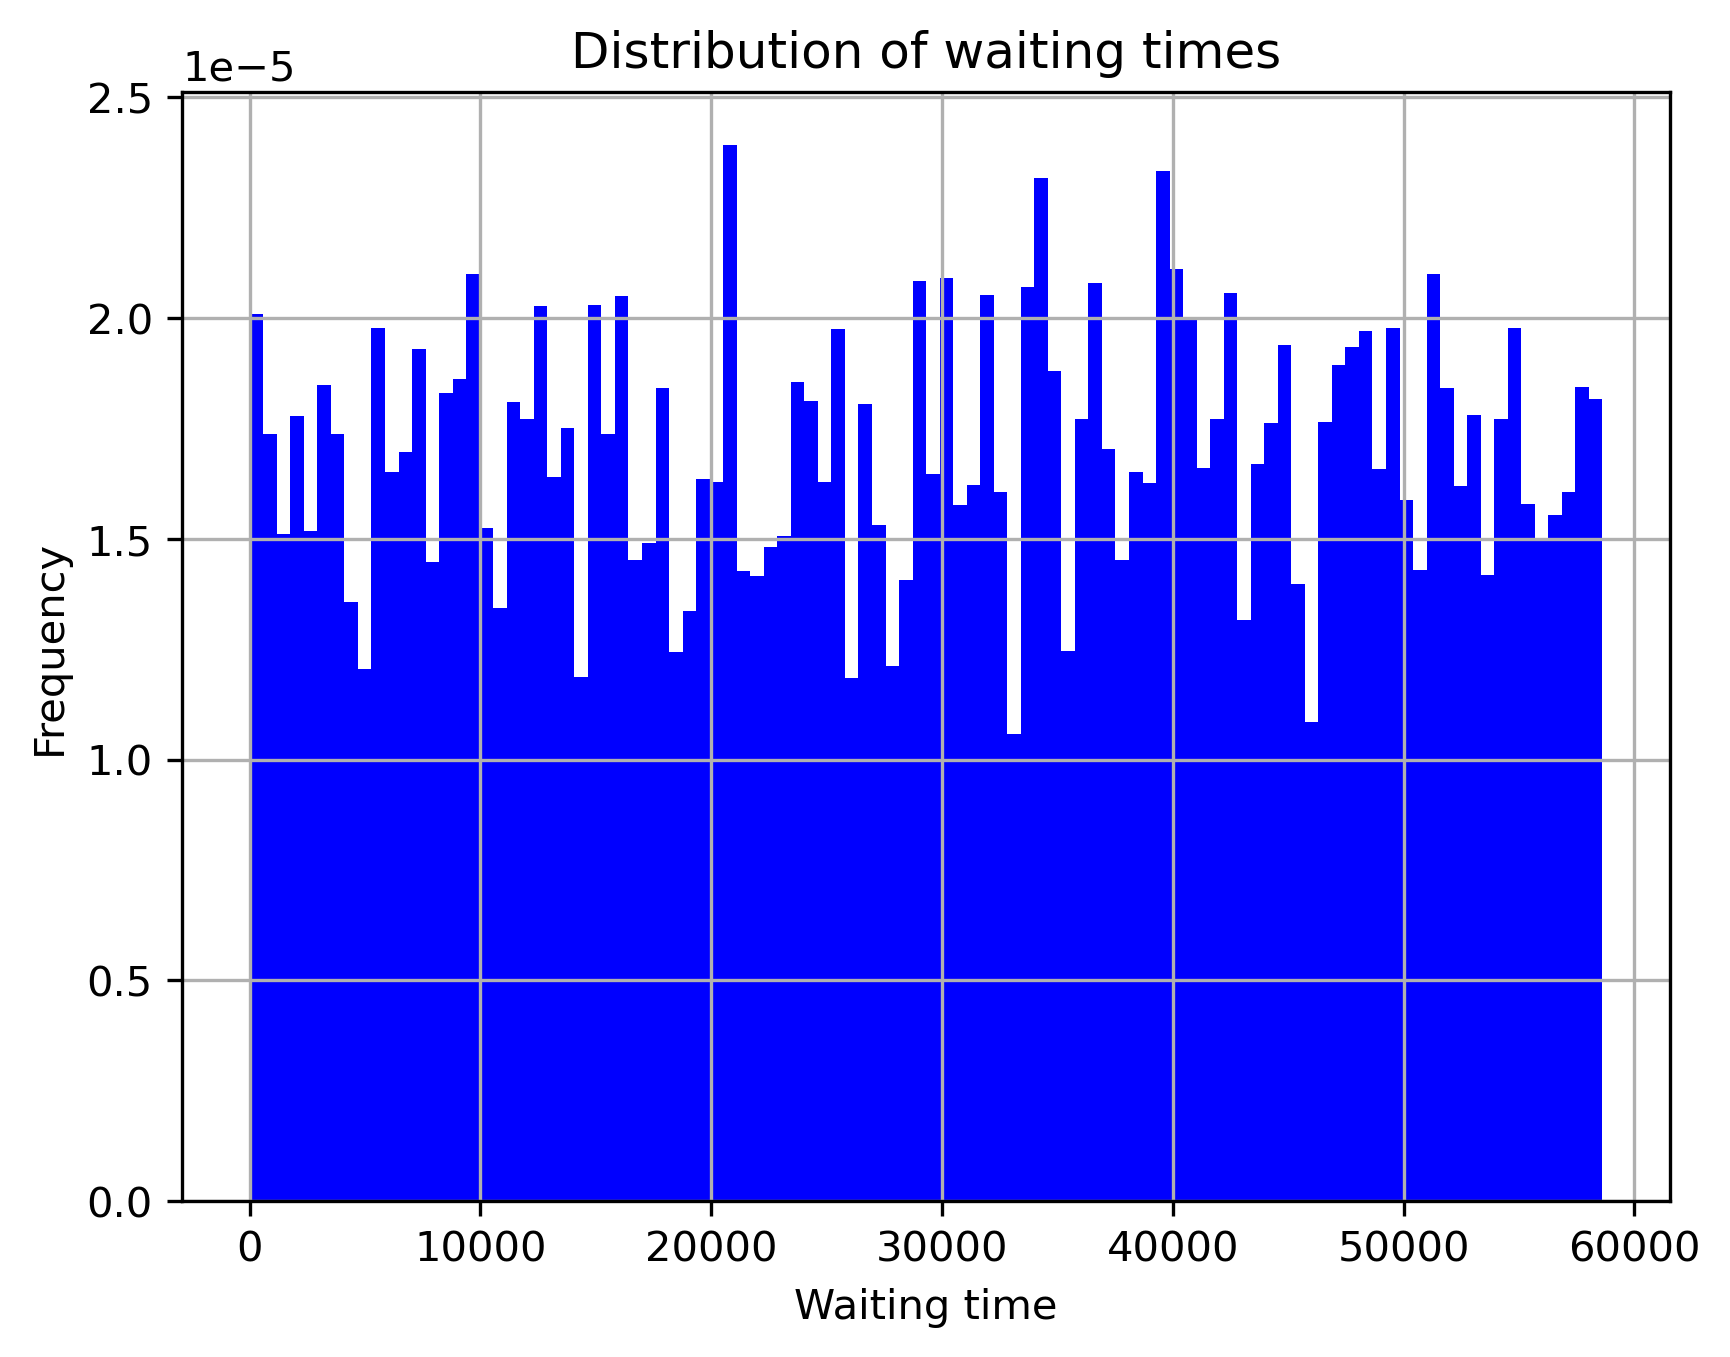

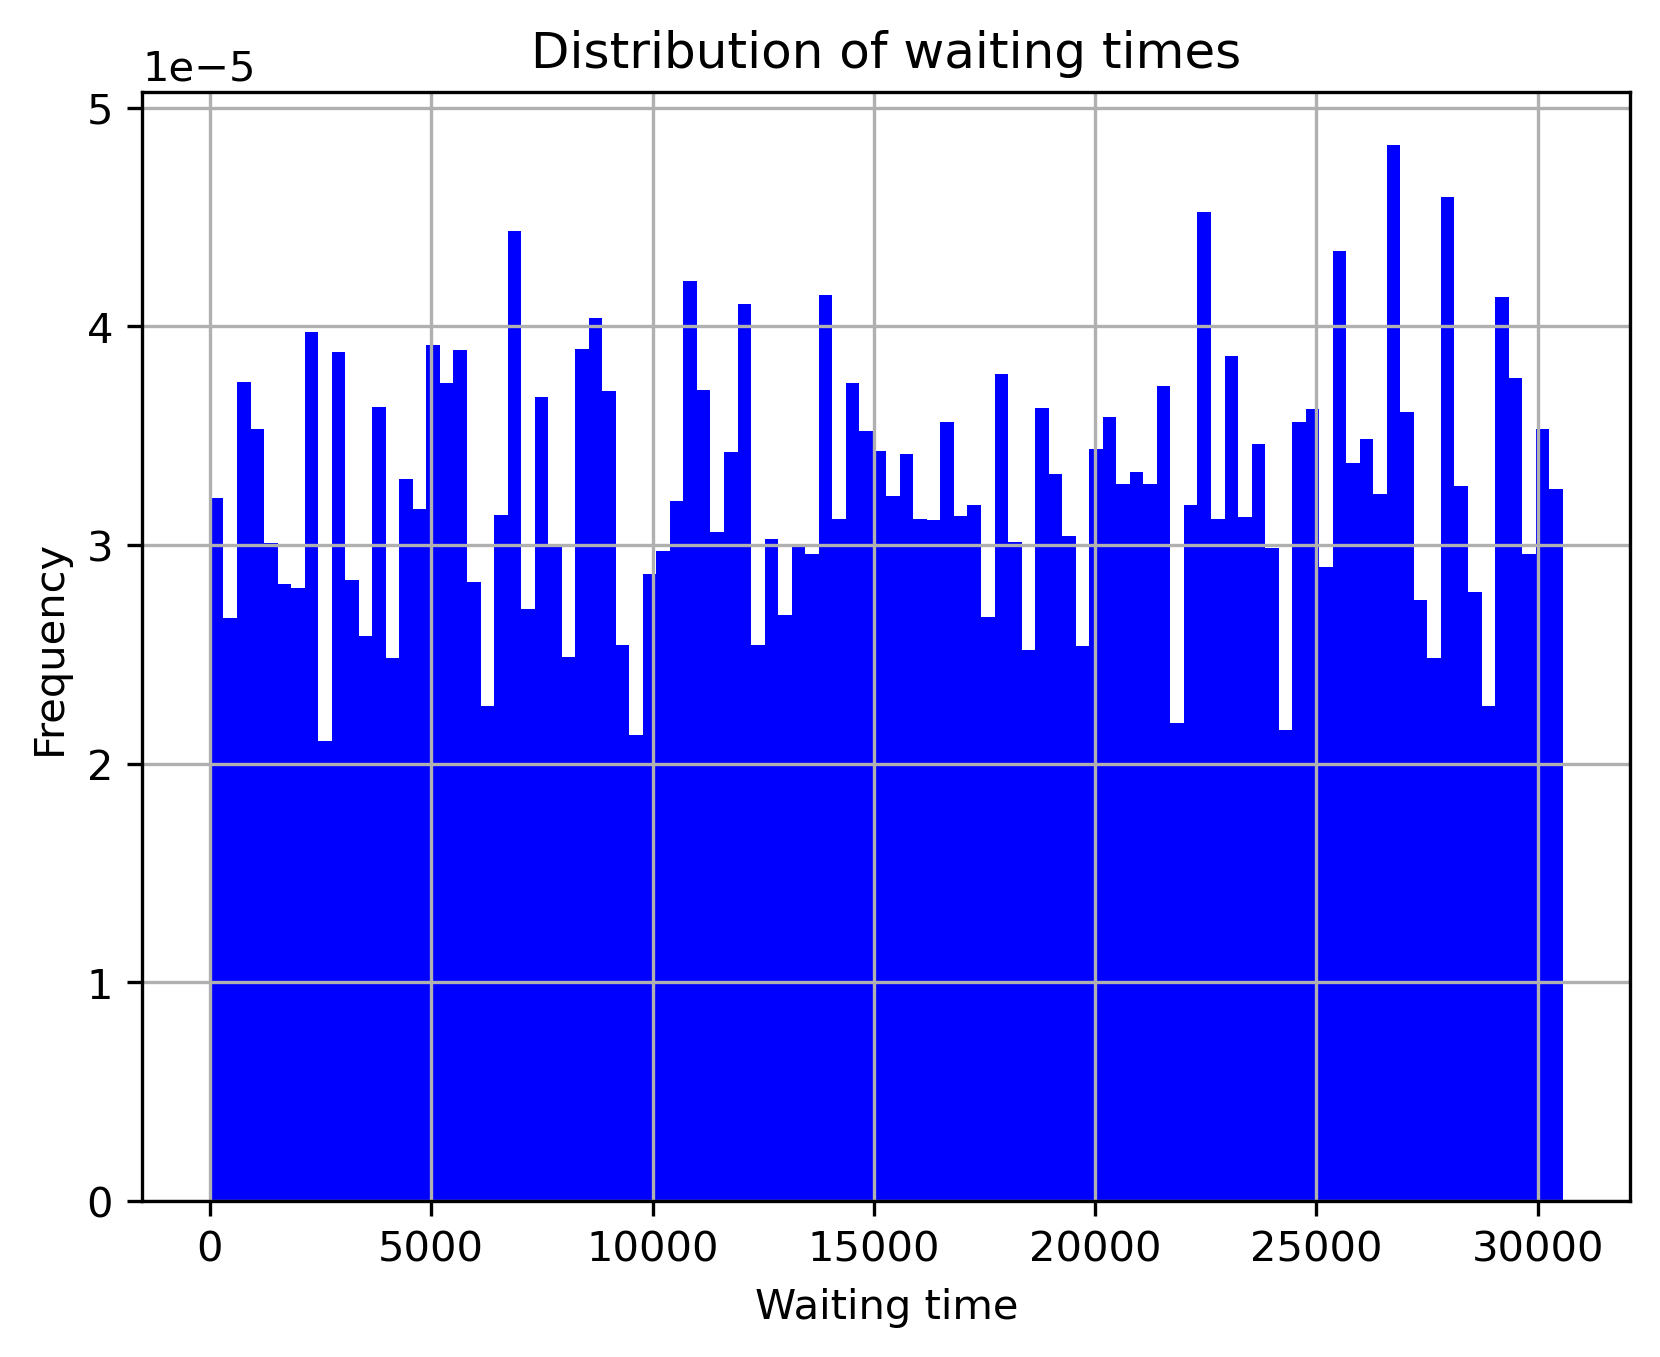

In [5]:
# Show the distributions of waiting times in M/L/1 and M/L/n
waiting = simulate_MLn(customers, rho, mu, p, 1)
fig, ax = visualize(waiting)

waiting = simulate_MLn(customers, rho, mu, p, 2)
fig, ax = visualize(waiting)